# Smart Call Center Analyzer – Modeling & Insights

## Customer Churn Modeling

In this notebook, we will:

✅ Load engineered features from the previous step  
✅ Train multiple models (Logistic Regression, Random Forest, XGBoost)  
✅ Evaluate using precision, recall, F1-score, confusion matrix  
✅ Save the best performing model for deployment

**Dataset:** `X_features.pkl`, `y_labels.pkl` (from feature engineering)

---


In [14]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## 📥 Step 1: Load Data

We load the engineered features (`X_features.pkl`) and labels (`y_labels.pkl`) that were generated in the previous notebook.

These datasets are ready for modeling.


In [15]:
# Load features and labels
X = joblib.load("../data/features/X_features.pkl")
y = joblib.load("../data/features/y_labels.pkl")

print("✅ Features and labels loaded.")
print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)

✅ Features and labels loaded.
Feature matrix shape: (1261888, 5010)
Labels shape: (1261888,)


## ✂️ Step 2: Train/Test Split

We split the data into training and test sets (80/20) using stratification to preserve the churn ratio.


In [16]:
from sklearn.model_selection import train_test_split

# Stratified split to maintain churn ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train/Test split done.")
print("Train size:", X_train.shape, "Test size:", X_test.shape)


✅ Train/Test split done.
Train size: (1009510, 5010) Test size: (252378, 5010)


## 📊 Step 3: Evaluation Helper

Define a helper function to print accuracy, precision, recall, F1-score and also plot a confusion matrix for easy visualization.


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print("✅ **Evaluation Metrics**")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-Score : {f1:.3f}")
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn','Churn'],
                yticklabels=['No Churn','Churn'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


## 📈 Train Logistic Regression Model

A **Logistic Regression** model is trained to predict churn.
This baseline is interpretable and easy to explain to stakeholders.


✅ Logistic Regression trained.
✅ **Evaluation Metrics**
Accuracy : 0.989
Precision: 0.940
Recall   : 0.959
F1-Score : 0.950

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    224768
           1       0.94      0.96      0.95     27610

    accuracy                           0.99    252378
   macro avg       0.97      0.98      0.97    252378
weighted avg       0.99      0.99      0.99    252378



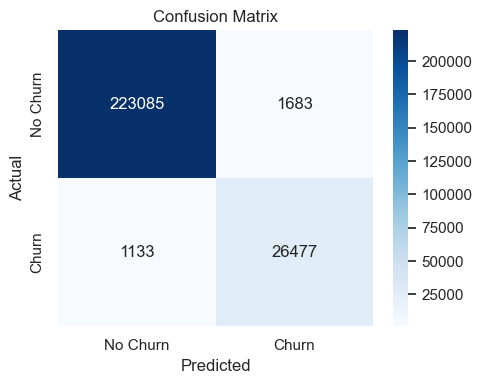

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
log_reg.fit(X_train, y_train)

print("✅ Logistic Regression trained.")
evaluate_model(log_reg, X_test, y_test)


## 🌳 Step 5: Random Forest

Train a Random Forest with reduced complexity (`n_estimators=100`, `max_depth=15`) to speed up training.


✅ Random Forest trained.
✅ **Evaluation Metrics**
Accuracy : 0.970
Precision: 0.887
Recall   : 0.829
F1-Score : 0.857

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    224768
           1       0.89      0.83      0.86     27610

    accuracy                           0.97    252378
   macro avg       0.93      0.91      0.92    252378
weighted avg       0.97      0.97      0.97    252378



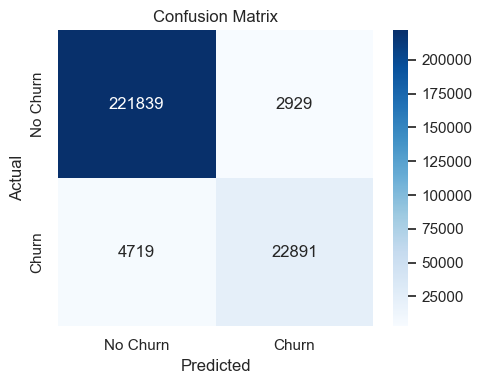

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,      # fewer trees 
    max_depth=15,         # limit depth to speed up
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf.fit(X_train, y_train)

print("✅ Random Forest trained.")
evaluate_model(rf, X_test, y_test)


## ⚡ Step 6: XGBoost

Train an XGBoost model (`tree_method='hist'` for speed) with class imbalance handling via `scale_pos_weight`.


✅ XGBoost trained (hist method).
✅ **Evaluation Metrics**
Accuracy : 0.994
Precision: 0.992
Recall   : 0.954
F1-Score : 0.973

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    224768
           1       0.99      0.95      0.97     27610

    accuracy                           0.99    252378
   macro avg       0.99      0.98      0.98    252378
weighted avg       0.99      0.99      0.99    252378



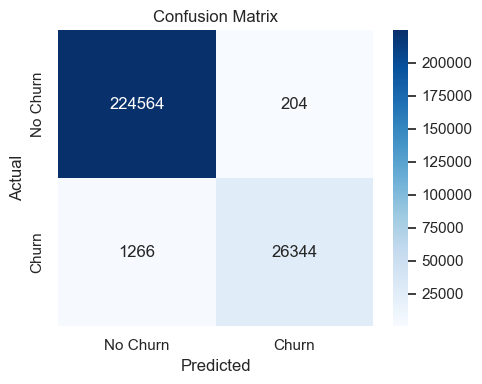

In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    tree_method='hist',  # ⚡ faster training
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)

print("✅ XGBoost trained (hist method).")
evaluate_model(xgb, X_test, y_test)


## 📊 Model Comparison & Findings

After training and evaluating three models on our engineered features:

| Model | Accuracy | Precision | Recall | F1-Score |
|-------|----------|-----------|--------|-----------|
| XGBoost | 0.994 | 0.992 | 0.954 | **0.973** |
| Logistic Regression | 0.989 | 0.940 | 0.959 | 0.950 |
| Random Forest | 0.970 | 0.887 | 0.829 | 0.857 |

✅ **Chosen Model:** **XGBoost**  
👉 XGBoost achieved the highest F1‑score (0.973), indicating the best balance between precision and recall for identifying churners.


## 💾 Step 7: Save the Best Model

After comparing metrics, we save the best performing model for deployment.


In [24]:
import joblib

# XGBoost was the best
joblib.dump(xgb, "../models/best_churn_model_XGBoost.pkl")
print("✅ Best model (XGBoost) saved to ../models/best_churn_model_XGBoost.pkl")


✅ Best model (XGBoost) saved to ../models/best_churn_model_XGBoost.pkl


## Next Steps

**Pipeline Completed:**  
- Features engineered and saved  
- Multiple models trained & evaluated  
- Best model saved for deployment  

**Next:**  
👉 Integrate with sentiment tagging & intent classification notebooks
